# Its a Real Estate data which type of classifiaction is used for that given data 

### We need to perform the following activities in order to solve the problem.

1. Importing Data
2. Cleaning, Preparing and Manipulating Data
3. Training and Testing Classification Model
4. Improvidng the Models
5. Conclusion

- Insert Some basic Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
pd.set_option('display.max_columns',500)   # used for the show max column 

- Load the Dataset

In [97]:
data1 = pd.read_csv("D:/Placement Assignment/Nobbas Technologies/CSV 1.csv")
data1.head(2)

,id,city,country,fullStreetAddress,postalCode,stateOrProvince,unitNumber,bathrooms,bedrooms,listingDescription,listingTitle,latitude,longitude,listPrice,livingArea,livingAreaUnit,yearBuilt,lotSize,lotSizeUnit,propertySubType,listingCategory,numParkingSpaces,createdAt,geocodioAccuracyScore,photoscount,grade
0,2698139,St Peters,US,12 Legacy Estates Lane,63376,MO,NaN,6,5,Tucked away in the private Legacy Estates subd...,"Residential, Traditional - St Peters, MO",NaN,NaN,425000.0,3046.0,squareFoot,1998.0,NaN,squareFoot,Single Family Detached,Purchase,3.0,2019-02-21 14:53:27.462+00,NaN,29,awesome
1,2698093,St Louis,US,222 Euclid Avenue,63119,MO,NaN,2,3,This charming Ranch offers hardwood flooring o...,"Residential, Traditional,Ranch - St Louis, MO",NaN,NaN,175000.0,1587.0,squareFoot,1962.0,7753.68,squareFoot,Single Family Detached,Purchase,1.0,2019-02-21 14:53:07.92+00,NaN,29,awesome


In [98]:
data2 = pd.read_csv("D:/Placement Assignment/Nobbas Technologies/CSV 2.csv")
data2.head(2)

,id,favouritecount
0,2698139,0
1,2698093,0


In [99]:
data3 = pd.read_csv("D:/Placement Assignment/Nobbas Technologies/CSV 3.csv")
data3.head(3)

,id,collabprojectscount
0,2698139,0
1,2698093,0
2,2698007,0


# 2. Cleaning, Preparing and Manipulating the Data

- For getting an insight about the dataset, we can get a quick summary about the dataset using 'info' and 'describe()' function.

- Now describe the data1 

- Describe gives a some information about numerical column in data like count, mean, std, min, 25%, 50%, 75% and maximum value

In [100]:
data1.describe()

,id,bathrooms,bedrooms,latitude,longitude,listPrice,livingArea,yearBuilt,lotSize,numParkingSpaces,geocodioAccuracyScore,photoscount
count,9.000000e+02,900.000000,900.000000,789.000000,789.000000,9.000000e+02,726.000000,791.000000,5.620000e+02,460.000000,27.000000,900.000000
mean,1.379640e+06,2.220000,2.948889,36.058472,-88.433106,4.455732e+05,2084.289256,1979.609355,1.224170e+05,3.919565,0.952963,18.700000
std,8.350904e+05,1.359857,2.110319,5.520729,13.363031,4.869270e+06,4154.019862,44.355673,1.110570e+06,46.660458,0.158012,16.242976
min,2.637000e+03,0.000000,0.000000,18.385107,-157.877612,2.850000e+02,0.000000,1111.000000,0.000000e+00,0.000000,0.330000,0.000000
25%,6.939698e+05,1.000000,2.000000,32.650636,-94.836975,6.497500e+04,1233.000000,1962.000000,6.534000e+03,1.000000,1.000000,1.000000
50%,1.362506e+06,2.000000,3.000000,36.053461,-84.288388,1.999000e+05,1684.000000,1987.000000,1.043262e+04,2.000000,1.000000,19.000000
75%,2.034228e+06,3.000000,4.000000,40.744408,-80.175833,3.399250e+05,2289.500000,2005.000000,2.178000e+04,2.000000,1.000000,30.000000
max,2.698139e+06,13.000000,51.000000,48.093560,-66.163046,1.450000e+08,99971.000000,2019.000000,1.899216e+07,1002.000000,1.000000,91.000000


In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 26 columns):
id                       900 non-null int64
city                     900 non-null object
country                  900 non-null object
fullStreetAddress        900 non-null object
postalCode               900 non-null object
stateOrProvince          899 non-null object
unitNumber               118 non-null object
bathrooms                900 non-null int64
bedrooms                 900 non-null int64
listingDescription       842 non-null object
listingTitle             900 non-null object
latitude                 789 non-null float64
longitude                789 non-null float64
listPrice                900 non-null float64
livingArea               726 non-null float64
livingAreaUnit           900 non-null object
yearBuilt                791 non-null float64
lotSize                  562 non-null float64
lotSizeUnit              900 non-null object
propertySubType          900 non-null

In [102]:
data1.shape 

(900, 26)

### Detailed profiling using pandas profiling

In [103]:
import pandas_profiling as pf

In [13]:
pf.ProfileReport(data1)

Number of variables,23
Number of observations,900
Total Missing (%),4.4%
Total size in memory,161.8 KiB
Average record size in memory,184.1 B
Numeric,10
Categorical,10
Boolean,0
Date,0
Text (Unique),1
Rejected,2


- Now check the null value in Data

In [38]:
data1.isnull().sum()/len(data1)*100

id                        0.000000
city                      0.000000
country                   0.000000
fullStreetAddress         0.000000
postalCode                0.000000
stateOrProvince           0.111111
unitNumber               86.888889
bathrooms                 0.000000
bedrooms                  0.000000
listingDescription        6.444444
listingTitle              0.000000
latitude                 12.333333
longitude                12.333333
listPrice                 0.000000
livingArea               19.333333
livingAreaUnit            0.000000
yearBuilt                12.111111
lotSize                  37.555556
lotSizeUnit               0.000000
propertySubType           0.000000
listingCategory           0.000000
numParkingSpaces         48.888889
createdAt                 0.000000
geocodioAccuracyScore    97.000000
photoscount               0.000000
grade                     0.000000
dtype: float64

- We find that there are no missing value in the data and hence we should not be bothered about this. We can use the dataset for further processing
- i have drop the column where the data is more than 40% is null

###  Remove the null Value processing

In [39]:
for i in data1.columns:
    if ((data1[i].isnull().sum()/len(data1[i])*100) > 40):
        print(i)
        data1.drop(i, axis=1, inplace=True)

unitNumber
numParkingSpaces
geocodioAccuracyScore


In [40]:
data1['stateOrProvince'] = data1['stateOrProvince'].fillna(data1['stateOrProvince'].mode()[0])

In [41]:
#
data1['stateOrProvince'] = data1['stateOrProvince'].fillna(data1['stateOrProvince'].mode()[0])

In [42]:
data1=data1.dropna(axis=0,subset=['listingDescription'])

In [43]:
data1.drop(['latitude','longitude'],axis=1,inplace=True)

In [44]:
data1['livingArea'].interpolate(method ='linear', limit_direction ='forward',inplace=True) 

In [45]:
data1['yearBuilt'].fillna(method='ffill',inplace=True)

In [50]:
data1['lotSize'].interpolate(method='linear',limit_direction='forward',inplace=True)

In [51]:
data1.isnull().sum()

id                    0
city                  0
country               0
fullStreetAddress     0
postalCode            0
stateOrProvince       0
bathrooms             0
bedrooms              0
listingDescription    0
listingTitle          0
listPrice             0
livingArea            0
livingAreaUnit        0
yearBuilt             0
lotSize               0
lotSizeUnit           0
propertySubType       0
listingCategory       0
createdAt             0
photoscount           0
grade                 0
dtype: int64

In [52]:
new_data = data1.drop('listingDescription',axis=1)
new_data.head()

,id,city,country,fullStreetAddress,postalCode,stateOrProvince,bathrooms,bedrooms,listingTitle,listPrice,livingArea,livingAreaUnit,yearBuilt,lotSize,lotSizeUnit,propertySubType,listingCategory,createdAt,photoscount,grade
0,2698139,St Peters,US,12 Legacy Estates Lane,63376,MO,6,5,"Residential, Traditional - St Peters, MO",425000.0,3046.0,squareFoot,1998.0,7753.68,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:27.462+00,29,awesome
1,2698093,St Louis,US,222 Euclid Avenue,63119,MO,2,3,"Residential, Traditional,Ranch - St Louis, MO",175000.0,1587.0,squareFoot,1962.0,7753.68,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:07.92+00,29,awesome
2,2698007,Ballwin,US,741 Woodside Trails Drive,63021,MO,3,3,"Traditional,Ranch, Condo - Ballwin, MO",295000.0,2437.0,squareFoot,1986.0,14766.84,squareFoot,Condominium,Purchase,2019-02-21 14:52:30.126+00,29,awesome
3,2697963,Manchester,US,301 Wembley Lane,63021,MO,2,3,"Traditional,Split Foyer, Residential - Manches...",215000.0,1780.0,squareFoot,1969.0,11848.32,squareFoot,Single Family Detached,Purchase,2019-02-21 14:52:11.85+00,29,awesome
4,2697938,O'fallon,US,27 Clear Meadows,63366,MO,4,4,"Residential, Traditional - O'Fallon, MO",375000.0,3405.0,squareFoot,2007.0,10890.00,squareFoot,Single Family Detached,Purchase,2019-02-21 14:51:55.495+00,29,awesome


In [53]:
new_data.drop(['listingTitle','fullStreetAddress'],axis=1,inplace=True)

In [54]:
new_data.drop(['livingAreaUnit','lotSizeUnit','id','createdAt'],axis=1,inplace=True)

In [55]:
new_data.head()

,city,country,postalCode,stateOrProvince,bathrooms,bedrooms,listPrice,livingArea,yearBuilt,lotSize,propertySubType,listingCategory,photoscount,grade
0,St Peters,US,63376,MO,6,5,425000.0,3046.0,1998.0,7753.68,Single Family Detached,Purchase,29,awesome
1,St Louis,US,63119,MO,2,3,175000.0,1587.0,1962.0,7753.68,Single Family Detached,Purchase,29,awesome
2,Ballwin,US,63021,MO,3,3,295000.0,2437.0,1986.0,14766.84,Condominium,Purchase,29,awesome
3,Manchester,US,63021,MO,2,3,215000.0,1780.0,1969.0,11848.32,Single Family Detached,Purchase,29,awesome
4,O'fallon,US,63366,MO,4,4,375000.0,3405.0,2007.0,10890.00,Single Family Detached,Purchase,29,awesome


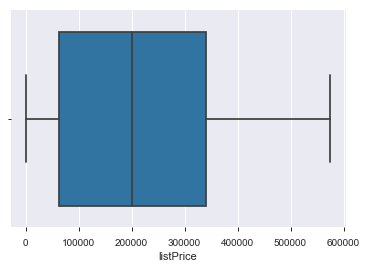

In [93]:
sns.boxplot(new_data['listPrice'])

In [104]:
# Capping Outlier listPrice

new_data['listPrice']= new_data['listPrice'].clip_upper(new_data['listPrice'].quantile(0.90)) 
new_data['listPrice']= new_data['listPrice'].clip_lower(new_data['listPrice'].quantile(0.01)) 

# Some Visulization

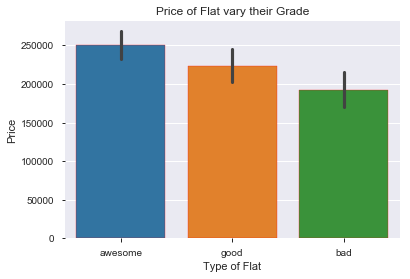

In [105]:
sns.barplot(x='grade',y='listPrice',data=new_data)
plt.xlabel('Type of Flat')
plt.ylabel('Price')
plt.title('Price of Flat vary their Grade')
plt.show()

- Here we see the three grade of Flat condition awesome, good and bad 
- Price of awesome flat is high than the other

<Figure size 648x936 with 0 Axes>

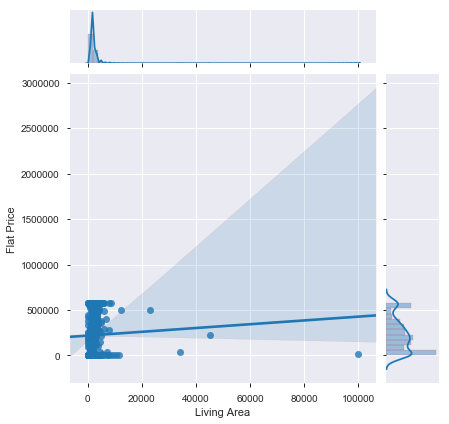

In [107]:
plt.figure(figsize=(9,13))
sns.jointplot(x='livingArea',y='listPrice', data=new_data,kind='reg')
plt.xlabel('Living Area')
plt.ylabel('Flat Price')
plt.show()

- In this graph we have see that how Flatprice is vary by living Area
- Flatprice and Livingarea is normally distributed 
- But some outlier in Flatprice

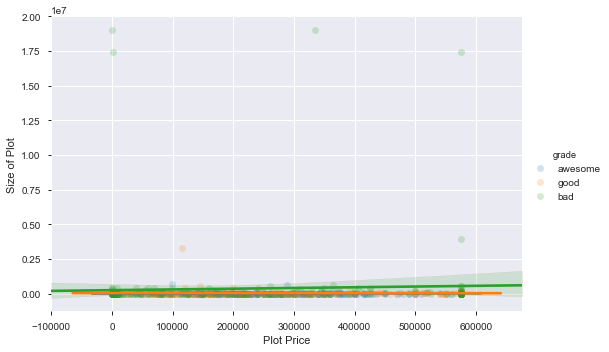

In [108]:
# Seaborn scatter plot with regression line
sns.lmplot(y='lotSize', x='listPrice', data=new_data, aspect=1.5, hue='grade',scatter_kws={'alpha':0.2})
plt.xlabel('Plot Price')
plt.ylabel('Size of Plot')
plt.show()

- The plotsize and the price is highly linearly correlated
- Some outlier plot price in awesome grade plot price 

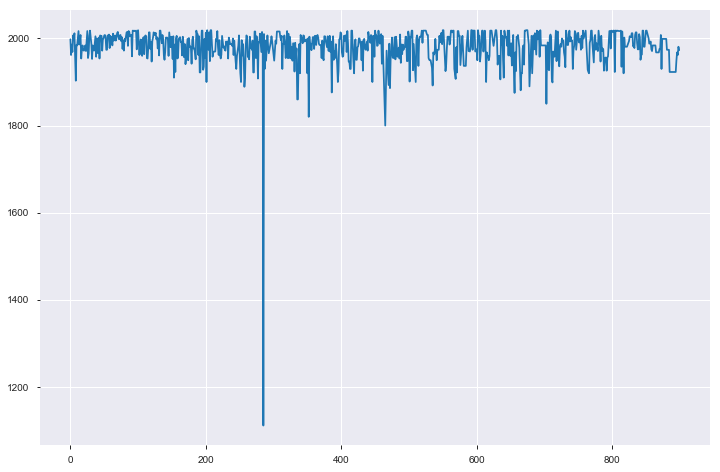

In [61]:
# BY YEAR
plt.figure(figsize=(12,8))
plt.plot(new_data['yearBuilt'])
plt.show()

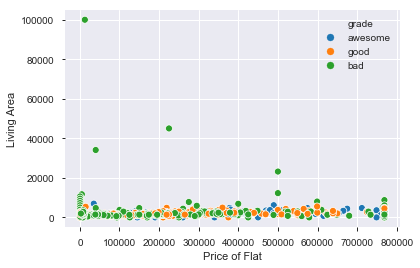

In [62]:
sns.scatterplot(y='livingArea',x='listPrice',hue='grade',data=new_data)
plt.xlabel('Price of Flat')
plt.ylabel('Living Area')
plt.show()

In [ ]:
- The living Area and price is highly correction 
- There are some point of price of flat is hight their grade is awesome
 

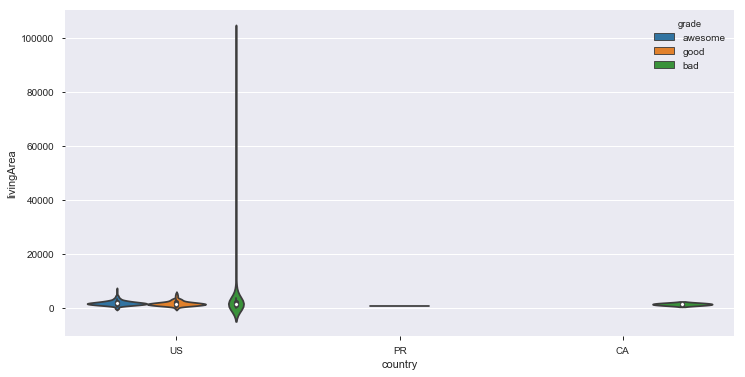

In [63]:
plt.figure(figsize=(12,6))
sns.violinplot(x='country',y='livingArea',hue='grade',data=new_data,split=False)
plt.show()

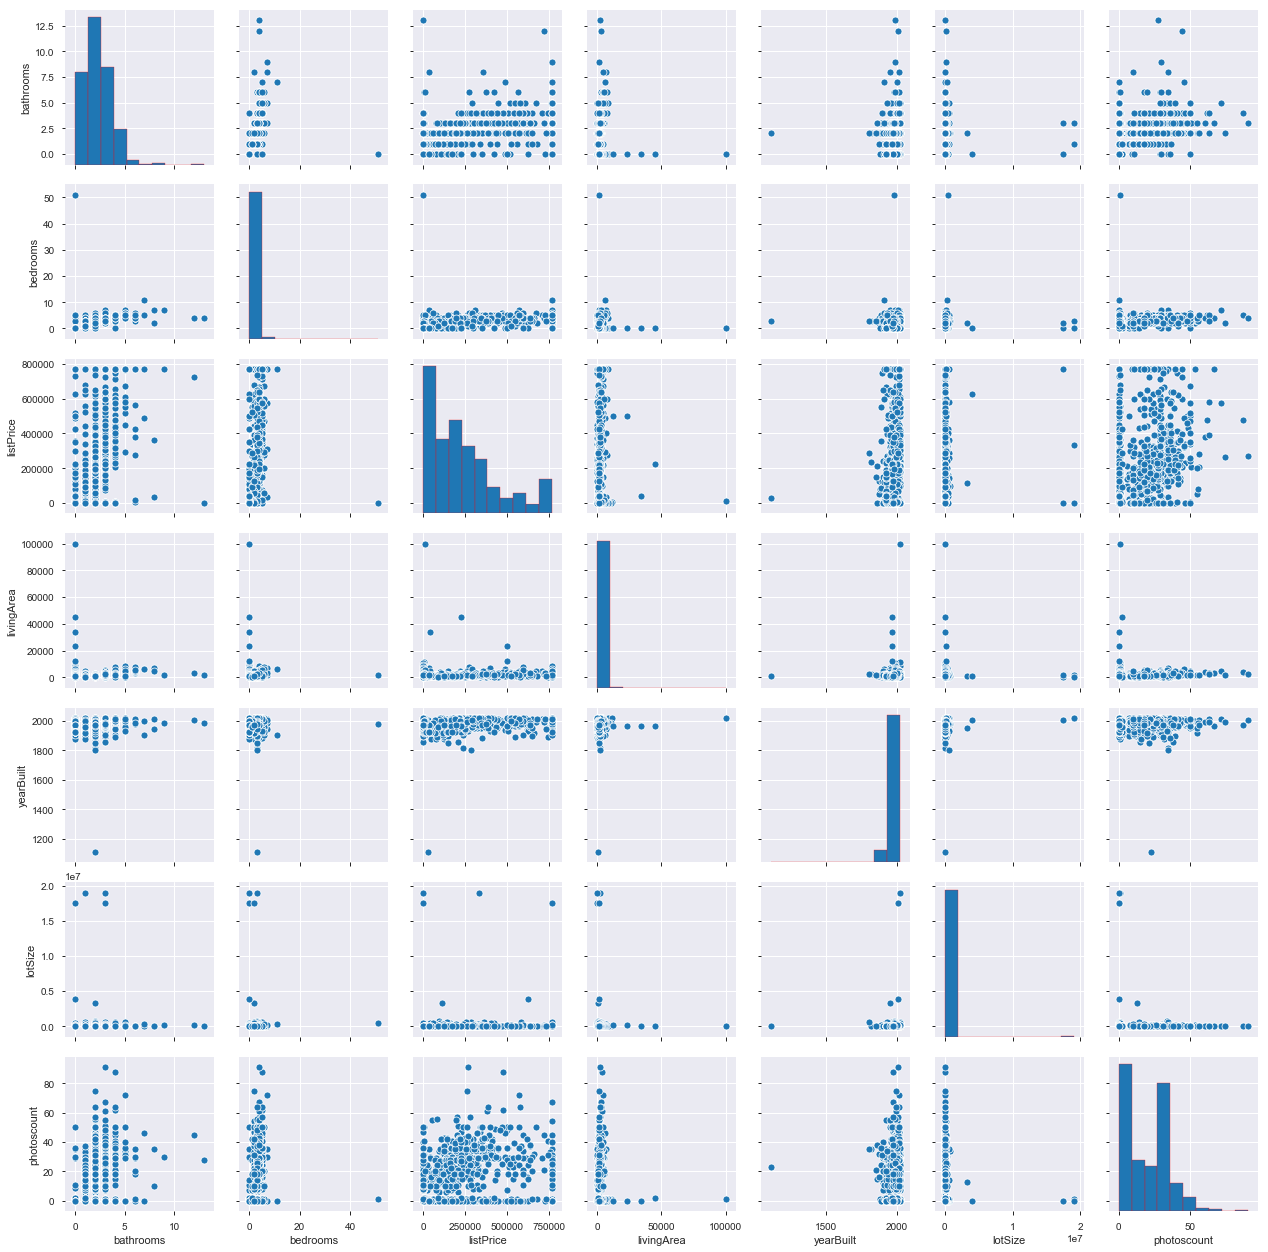

In [64]:
plt.rcParams['patch.force_edgecolor']=True
plt.rcParams['patch.edgecolor']='red'
sns.pairplot(new_data)
plt.show()

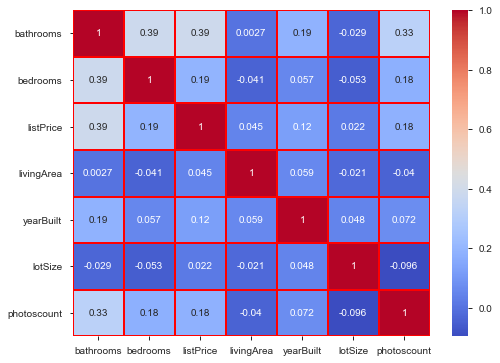

In [65]:
# heatmap and correlation
plt.figure(figsize=(8,6))
sns.heatmap(new_data.corr(),annot=True,linewidths=1,linecolor='red',cmap='coolwarm')
plt.show()

# Model 

In [66]:
new_data.shape

(842, 14)

In [67]:
new_data_dummy = pd.get_dummies(new_data.drop(['grade'],axis=1))
new_data_dummy.head()

,bathrooms,bedrooms,listPrice,livingArea,yearBuilt,lotSize,photoscount,city_ANNAPOLIS,city_Abbeville,city_Acworth,city_Aiken,city_Akron,city_Albany,city_Albuquerque,city_Allen,city_Allentown,city_Alta,city_Altoona,city_Anderson,city_Ankeny,city_Arlington,city_Arnold,city_Atlanta,city_Atlantic City,city_Austin,city_Aventura,city_Avondale,city_BALTIMORE,city_BIRMINGHAM,city_BONITA SPRINGS,city_BRAMPTON,city_BROADWAY,city_Bakersfield,city_Ballwin,city_Barnes,city_Barrington,city_Basehor,city_Baton Rouge,city_Baxter,city_Bay Harbor Islands,city_Bayamón,city_Bayside,city_Beaverton,city_Beechhurst,city_Bellevue,city_Bermuda Dunes,city_Bernards,city_Bethlehem,city_Big Bear,city_Big Bear Lake,city_Billings,city_Bismarck,city_Bloomingdale Boro,city_Blytheville,city_Boca Raton,city_Brentwood,city_Bridgeport,city_Brigantine,city_Bristol,city_Brock,city_Bronx,city_Brooklyn,city_Brunswick,city_Brussels,city_Burleson,city_CAPE CORAL,city_CHICAGO,city_CLEARWATER,city_CLERMONT,city_COLUMBIA,city_CRAWFORDVILLE,city_Calera,city_Camby,city_Campton,city_Candor,city_Canterbury,city_Canton,city_Carthage,city_Casa Grande,city_Cathedral City,city_Cedar Rapids,city_Cedartown,city_Cerritos,city_Chandler,city_Chapel Hill,city_Charleston,city_Charlotte,city_Chase City,city_Chattahoochee Hills,city_Chesnee,city_Chesterfield,city_Cheyenne,city_Chicago,city_Chippewa Falls,city_Cicero,city_City Of Orange Twp.,city_Claremore,city_Clarksville,city_Clinton,city_Clive,city_Coachella,city_Coconut Grove,city_College Station,city_Colleyville,city_Collinsville,city_Colonie,city_Colorado Springs,city_Columbia,city_Columbus,city_Conway,city_Cookson,city_Coolidge,city_Coon Rapids,city_Coral Springs,city_Cordova,city_Corpus Christi,city_Crane Hill,city_Crescent,city_Crete,city_Cromwell,city_DADE CITY,city_DAVENPORT,city_Dale,city_Dallas,city_Davie,city_De Pere,city_Deatsville,city_Decatur,city_Deerfield Beach,city_Delaware,city_Delray Beach,city_Demorest,city_Denton,city_Derby,city_Derry,city_Des Moines,city_Detroit,city_Donalsonville,city_Doral,city_Dothan,city_Douglas,city_Douglasville,city_Dry Ridge,city_Dubuque,city_Duluth,city_Dundee,city_Duryea,city_EAST DUNDEE,city_ELGIN,city_ELLICOTT CITY,city_Earlham,city_East Dublin,city_East Hills,city_East Orange City,city_Eastlake,city_Edinburg,city_Eight Mile,city_El Paso,city_Elgin,city_Elizabeth City,city_Elkhart,city_Elkhorn,city_Elkins,city_Ellijay,city_Enfield,city_Euless,city_Eustis,city_Evansville,city_FAYETTEVILLE,city_FORT MYERS,city_FOX LAKE,city_Fairfield Bay,city_Fayetteville,city_Fenton,city_Flagstaff,city_Flatonia,city_Flint,city_Florence,city_Flushing,city_Forney,city_Fort Atkinson,city_Fort Lauderdale,city_Fort Walton Beach,city_Frankfort,city_Frankfort NY,city_Fremont,city_Fresno,city_Frisco,city_Gainesville,city_Galena,city_Garland,city_Gastonia,city_Gatlinburg,city_Gaylord,city_Gilbert,city_Glendale,city_Gold Hill,city_Goodyear,city_Goose Creek,city_Great Falls,city_Green Bay,city_Greenbrier,city_Greensboro,city_Grimes,city_Groesbeck,city_Groton,city_Grovetown,city_Gruver,city_Gun Barrel City,city_HALLSVILLE,city_HAYDEN,city_HOLIDAY,city_Haslet,city_Healdton,city_Henderson,city_Hendersonville,city_Henrico,city_Hereford,city_Hesperia,city_Hialeah,city_Hiram,city_Hixson,city_Hoboken,city_Hollywood,city_Homestead,city_Hon.,city_Hopkins,city_Horseheads,city_Hot Springs Vill.,city_HotSprings,city_Houston,city_Hudsonville,city_Huntersville,city_IRMO,city_Idyllwild,city_Ilion NY,city_Independence,city_Indian Town,city_Indianapolis,city_Ingleside,city_Iron River,city_Ithaca,city_JACKSONVILLE,"city_JC, Bergen-Lafayett",city_Jackson,city_Jacksonville,city_Jamaica,city_Jamestown,city_Jeffersonville,city_Jenison,...,postalCode_75081,postalCode_75088,postalCode_75089,postalCode_75126,postalCode_75156,postalCode_75602,postalCode_75701,postalCode_75789,postalCode_76028,postalCode_76034,postalCode_76040,postalCode_76052,postalCode_76179,postalCode_76180,postalCode_76205,postalCode_76207,postalCode_76538,postalCode_7661,

In [68]:
new_data_dummy['grade']=new_data['grade']

In [69]:
new_data_dummy.shape

(842, 1389)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix

In [71]:
train,test = train_test_split(new_data_dummy,test_size=.2,random_state=100)

In [72]:
train.shape

(673, 1389)

In [73]:
test.shape

(169, 1389)

In [74]:
train_y=train['grade']
test_y=test['grade']

train_x=train.drop('grade',axis=1)
test_x=test.drop('grade',axis=1)

In [75]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)

rf_pred = rf.predict(test_x)
rf_acc = accuracy_score(test_y,rf_pred)
rf_acc

C:\Users\Dhiru\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8047337278106509

In [76]:
rf_kapp=cohen_kappa_score(test_y,rf_pred)
rf_kapp

0.7086054652803178

In [77]:
rf_class = classification_report(test_y,rf_pred)
print(rf_class)

              precision    recall  f1-score   support

     awesome       0.62      0.88      0.72        48
         bad       0.98      0.94      0.96        63
        good       0.85      0.60      0.71        58

   micro avg       0.80      0.80      0.80       169
   macro avg       0.82      0.80      0.80       169
weighted avg       0.83      0.80      0.81       169



In [78]:
gr = GradientBoostingClassifier()
gr.fit(train_x,train_y)

gr_predict = gr.predict(test_x)

gr_acc = accuracy_score(test_y,gr_predict)
gr_acc

0.9171597633136095

In [79]:
gr_kappa=  cohen_kappa_score(test_y,gr_predict)
gr_kappa

0.8757613946649864

In [80]:
gr_class = classification_report(test_y,gr_predict)
print(gr_class)

              precision    recall  f1-score   support

     awesome       0.78      0.98      0.87        48
         bad       1.00      1.00      1.00        63
        good       0.98      0.78      0.87        58

   micro avg       0.92      0.92      0.92       169
   macro avg       0.92      0.92      0.91       169
weighted avg       0.93      0.92      0.92       169



In [81]:
Ada = AdaBoostClassifier()
Ada.fit(train_x,train_y)
Ada_predict = Ada.predict(test_x)

Ada_acc = accuracy_score(test_y,Ada_predict)
Ada_acc

0.9112426035502958

In [82]:
Ada_Kappa = cohen_kappa_score(test_y,Ada_predict)
Ada_Kappa

0.8670965712488203

In [83]:
Ada_class = classification_report(test_y,Ada_predict)
print(Ada_class)

              precision    recall  f1-score   support

     awesome       0.76      1.00      0.86        48
         bad       1.00      1.00      1.00        63
        good       1.00      0.74      0.85        58

   micro avg       0.91      0.91      0.91       169
   macro avg       0.92      0.91      0.91       169
weighted avg       0.93      0.91      0.91       169



### Hyperparameter Tune through RandomizeSearchCV

In [514]:
from sklearn.model_selection import RandomizedSearchCV

In [519]:
gr_model = GradientBoostingClassifier()
params ={'max_depth':list(range(3,11)), 'min_samples_split':[8,5, 6, 10,11, 12,7],'n_estimators':[100,200,500,1000],
        'max_depth':[3,5,7,10,12],'subsample':[0.5,0.7,0.8,1]}



random_cv = RandomizedSearchCV(gr_model, params)
random_cv.fit(train_x, train_y)
random_cv.best_params_

C:\Users\Dhiru\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'subsample': 0.5,
 'n_estimators': 100,
 'min_samples_split': 11,
 'max_depth': 5}

In [520]:
gr_final = GradientBoostingClassifier(subsample=0.5,n_estimators=100,min_samples_split=11, max_depth=5)
gr_final.fit(train_x,train_y)

gr_final_predict = gr_final.predict(test_x)

gr_acc_final = accuracy_score(test_y,gr_final_predict)
gr_acc_final

0.9053254437869822

In [521]:
gr_final_kappa = cohen_kappa_score(test_y,gr_final_predict)
gr_final_kappa

0.8580130224742701

In [523]:
gr_final_class = classification_report(test_y,gr_final_predict)
print(gr_final_class)

              precision    recall  f1-score   support

     awesome       0.77      0.96      0.85        48
         bad       1.00      1.00      1.00        63
        good       0.96      0.76      0.85        58

   micro avg       0.91      0.91      0.91       169
   macro avg       0.91      0.91      0.90       169
weighted avg       0.92      0.91      0.91       169



In [ ]:
## Text Classification in this dataset column through listingDescription

In [524]:
data1.head()

,id,city,country,fullStreetAddress,postalCode,stateOrProvince,bathrooms,bedrooms,listingDescription,listingTitle,listPrice,livingArea,livingAreaUnit,yearBuilt,lotSize,lotSizeUnit,propertySubType,listingCategory,createdAt,photoscount,grade
0,2698139,St Peters,US,12 Legacy Estates Lane,63376,MO,6,5,Tucked away in the private Legacy Estates subd...,"Residential, Traditional - St Peters, MO",425000.0,3046.0,squareFoot,1998.0,7753.68,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:27.462+00,29,awesome
1,2698093,St Louis,US,222 Euclid Avenue,63119,MO,2,3,This charming Ranch offers hardwood flooring o...,"Residential, Traditional,Ranch - St Louis, MO",175000.0,1587.0,squareFoot,1962.0,7753.68,squareFoot,Single Family Detached,Purchase,2019-02-21 14:53:07.92+00,29,awesome
2,2698007,Ballwin,US,741 Woodside Trails Drive,63021,MO,3,3,This is the LARGEST Villa-style condo in this ...,"Traditional,Ranch, Condo - Ballwin, MO",295000.0,2437.0,squareFoot,1986.0,14766.84,squareFoot,Condominium,Purchase,2019-02-21 14:52:30.126+00,29,awesome
3,2697963,Manchester,US,301 Wembley Lane,63021,MO,2,3,Over 1700 sq ft of updated living space in con...,"Traditional,Split Foyer, Residential - Manches...",215000.0,1780.0,squareFoot,1969.0,11848.32,squareFoot,Single Family Detached,Purchase,2019-02-21 14:52:11.85+00,29,awesome
4,2697938,O'fallon,US,27 Clear Meadows,63366,MO,4,4,"Move in ready, excellent condition. Outstandin...","Residential, Traditional - O'Fallon, MO",375000.0,3405.0,squareFoot,2007.0,10890.00,squareFoot,Single Family Detached,Purchase,2019-02-21 14:51:55.495+00,29,awesome


In [526]:
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [533]:
def create_wc(flatdesc, col):
    words = ' '.join(flatdesc[col])  
    stopwords = set(STOPWORDS)
    word_mod = re.sub("[^a-zA-Z0-9 ]+"," ",words)
    
    wc = WordCloud(background_color='black',stopwords=stopwords,min_font_size=16).generate(word_mod)
    
    plt.figure(figsize=(12,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

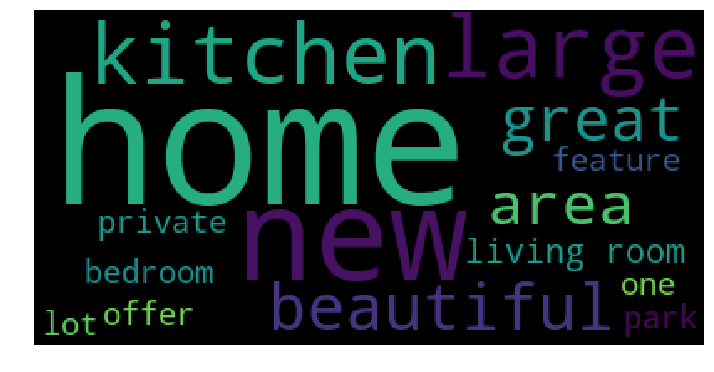

In [534]:
create_wc(data1,'listingDescription')

## 2. Data is insfficient and we cant do any classification problem in this dataset because our target column is only one value so it is unachivable 

In [ ]:
## 3.  Data is insfficient and the data target column is only one value 0 they are not given another value so this problem is also  Unachievable. In the Target column the target column is collabprojects if we give some value in collabprojects column then we have classify the binary class in the dataset because th 
